# Clustering Mini-project Wk 10

Aaron Palumbo

## Objective

Here we will use a dataset from http://cs.joensuu.fi/sipu/datasets/. In particular, we will use Birch1 (Zhang et al., "BIRCH: A new data clustering algorithm and its applications", Data Mining and Knowledge Discovery, 1 (2), 141-182, 1997.), which is a synthetic 2-d dataset with N=100,000 vectors and M=100 clusters. The clusters are arranged in a grid pattern. One reason to use this dataset is that the results are easily evaluated, which will allow us to focus on the algorithm.

We will be using the Spark implementation of K-Means algorithm, drawing heavily from the documentation here: http://spark.apache.org/docs/latest/mllib-clustering.html#k-means.

## Dependencies

In [2]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

import matplotlib.pyplot as plt
from matplotlib import cm

import os

%matplotlib inline

Next we need to load the data directly into our spark context (sc). We do this by reading the text file, however, we then need to  parse the text file into the array we need. We do this by splitting each line with our map function.

In [3]:
# Load and parse the data
data = sc.textFile("file://" + os.getcwd() + "/birch1.txt")
# parsedData = data.map(lambda line: array([float(x) for x in line.split(' ') if len(x) > 0]))
parsedData = data.map(lambda line: array([float(x) for x in line.split()]))

Now we are ready to call the clustering algorithm from MLLib. We have a fairly limited set of tuning parameters. We will choose the same number of iterations we chose when running the Hadoop map reduce job for the  wk 8 project, however this time we will allow the algorithm to do this 10 times (runs). This is because the kmeans algorithm is subject to local minimum. 10 runs with 10 random initializations will hopefully allow us to find a good solution.

In [4]:
# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 100, maxIterations=10,
                       runs=10, initializationMode="random")

In [5]:
clusters.centers[:20]

[array([ 523038.60129136,   77926.27118644]),
 array([ 172827.54142012,   81093.87573964]),
 array([ 384090.31701807,   78071.98493976]),
 array([ 353086.69103774,  351000.41509434]),
 array([ 355600.42912371,  468150.34536082]),
 array([ 362799.04571429,  414329.43619048]),
 array([ 455250.32310838,  146318.90797546]),
 array([ 702120.17511521,  819997.49385561]),
 array([ 453684.13869258,  825309.16431095]),
 array([ 909171.81300813,  338070.66504065]),
 array([ 542279.1272052 ,  447990.13091922]),
 array([ 173263.57427717,  356262.27716849]),
 array([ 635317.94438723,  172146.21730175]),
 array([ 522933.4528754 ,  910559.68290735]),
 array([ 264536.9751434 ,  359982.30688337]),
 array([ 627027.64858097,  268705.73539232]),
 array([  80486.73734729,  901370.7408377 ]),
 array([ 818126.55237154,  175580.02470356]),
 array([ 713761.19844694,  357710.07075065]),
 array([ 818664.35329949,  912519.36446701])]

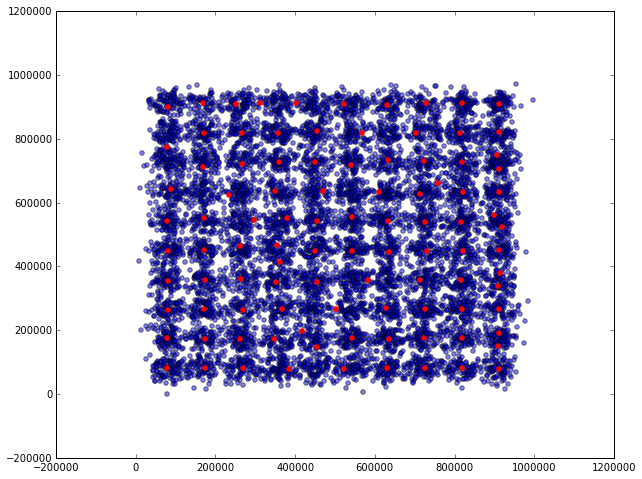

In [6]:
sampledData = parsedData.sample(False, 0.1, 81).collect()
[x, y] = array(sampledData).transpose()
[cx, cy] = array(clusters.centers).transpose()

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x, y, alpha=0.5)
ax.scatter(cx, cy, color="red")

In [7]:
clusters.k

100

Now let's take a look at the actual clusters:

In [22]:
predicted = [clusters.predict(i) for i in zip(x, y)]

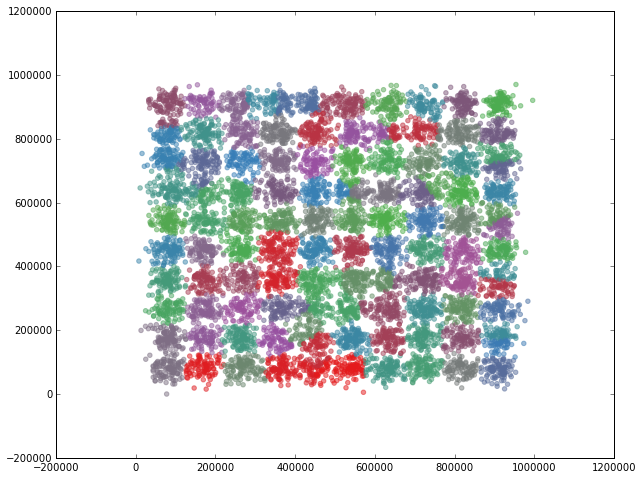

In [42]:
cmap = cm.Set1(range(100))

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x, y, alpha=0.5, color=cmap[predicted])

So we see that even though some of the centers appear to be off, the algorithm does a good job of separating the clusters.

Obviously using the clustering algorithm from MLlib with pyspark was much easier than using Hadoop Kmeans clustering from the week 8 assignment. It also produced a much better answer in a lot less time. The time difference is impressive. The algorithm ran 10 times as many computations and was still noticeably faster.